In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [12]:
np.random.seed(49)
population = np.random.choice([0, 1], size=1000, p=[0.4, 0.6])
print(np.sum(population))

596


In [14]:
sample = np.random.choice(population, size=100, replace=False)
sample

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [21]:
len(sample)

100

In [22]:
answer_rate = sum(sample)/len(sample)
answer_rate

np.float64(0.63)

In [33]:
ci_up = answer_rate + 1.96 * np.sqrt(answer_rate*(1-answer_rate) / len(sample))

In [31]:
ci_lo = answer_rate - 1.96 * np.sqrt(answer_rate*(1-answer_rate) / len(sample))

In [34]:
print(f"95% доверительный интервал: from {ci_lo:.4f} to {ci_up:.4f}")

95% доверительный интервал: from 0.5354 to 0.7246


In [ ]:
Здесь мы выяснили, что доля положительных ответов населения попадает в доверительный интервал. 
Значит с 95%-ной уверенностью мы можем утверждать, что истинная доля населения будет находиться в этом интервале.

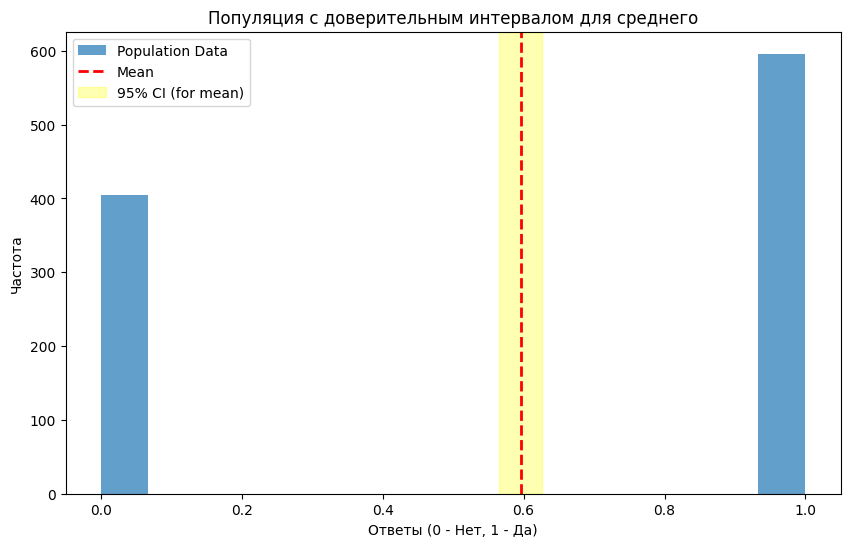

In [52]:
mean = np.mean(population)
sem = st.sem(population)

# Доверительный интервал для среднего
ci_large_1, ci_large_2 = st.norm.interval(confidence=0.95, loc=mean, scale=sem)
# Построение графика для популяции
plt.figure(figsize=(10, 6))
plt.hist(population, bins=15, alpha=0.7, label='Population Data')

# Рисуем среднее значение
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label='Mean')

# Выделяем доверительный интервал для среднего
plt.axvspan(ci_large_1, ci_large_2, color='yellow', alpha=0.3, label='95% CI (for mean)')

plt.xlabel('Ответы (0 - Нет, 1 - Да)')
plt.ylabel('Частота')
plt.title('Популяция с доверительным интервалом для среднего')
plt.legend()
plt.show()

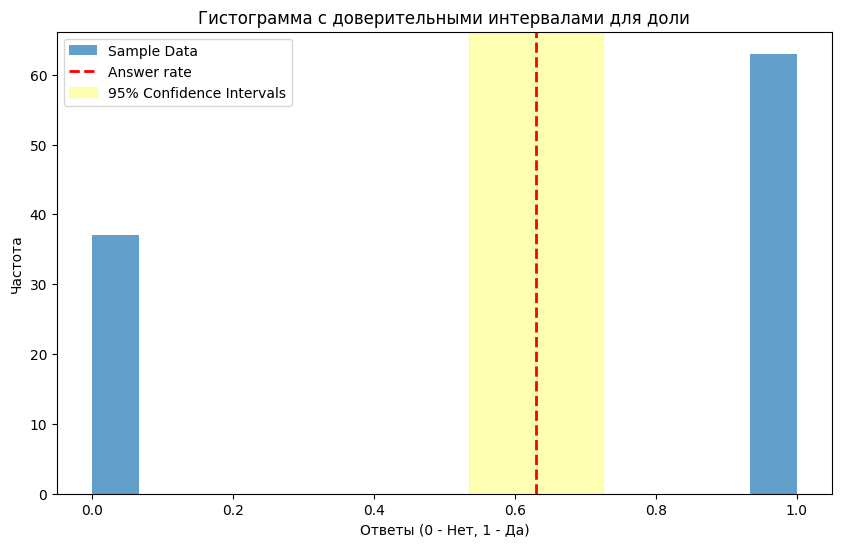

In [51]:
# Для доли
# plt.figure(figsize=(10, 6))
# plt.hist(sample, bins=15, alpha=0.7, label='Sample Data')
# # Построение графика среднего значения
# plt.axvline(answer_rate, color='red', linestyle='dashed', linewidth=2, label='Answer rate')
# # Выделение доверительного интервала
# plt.axvspan(ci_lo, ci_up, color='yellow', alpha=0.3, label='95% Confidence Intervals')

# plt.xlabel('Ответы (0 - Нет, 1 - Да)')
# plt.ylabel('Частота')
# plt.title('Гистограмма с доверительными интервалами для доли')
# plt.legend()
# plt.show()

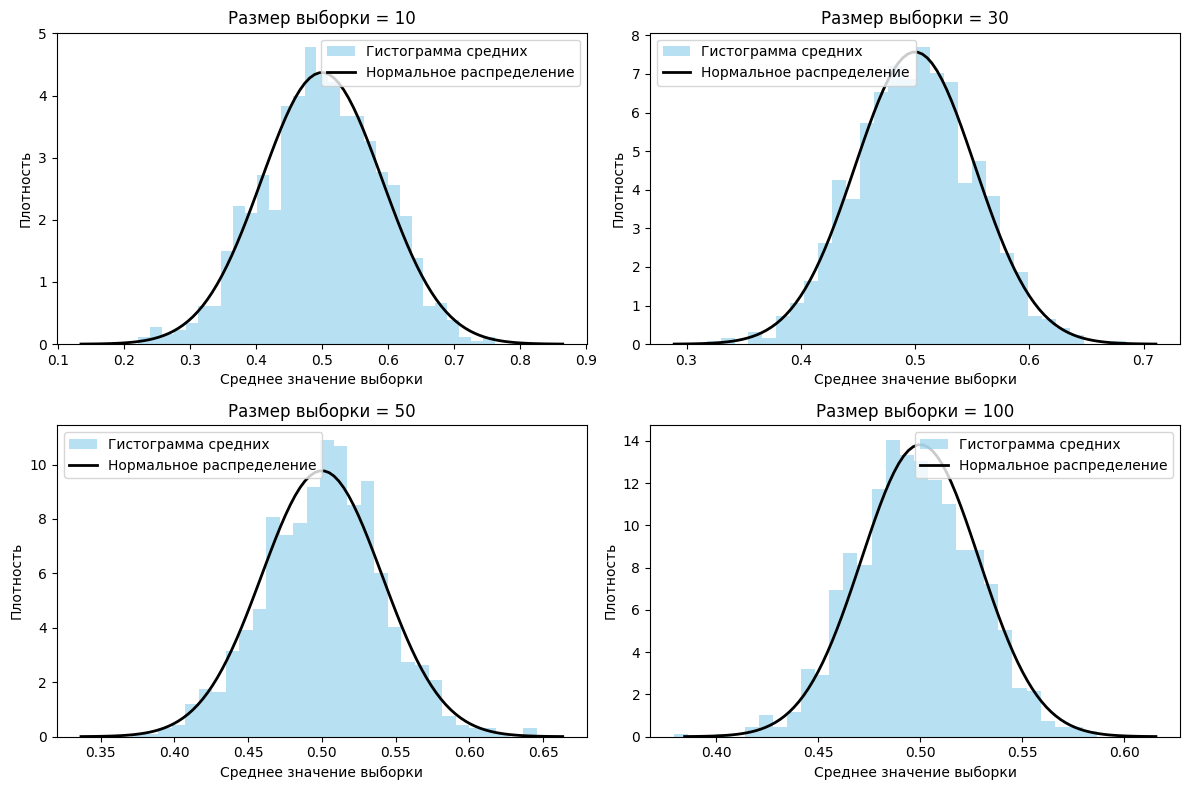

In [3]:
# Параметры равномерного распределения
a = 0
b = 1
mu = (a + b) / 2
sigma = np.sqrt((b - a)**2 / 12)

# Функция для генерации выборочных средних
def generate_sample_means_uniform(sample_size, num_samples):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.uniform(a, b, sample_size)
        sample_means.append(np.mean(sample))
    return sample_means

# Разные размеры выборки
sample_sizes = [10, 30, 50, 100]
num_samples = 1000

# График для разных sample_size
plt.figure(figsize=(12, 8))
for i, sample_size in enumerate(sample_sizes):
    sample_means = generate_sample_means_uniform(sample_size, num_samples)
    plt.subplot(2, 2, i+1)
    plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='skyblue', label='Гистограмма средних')

    # кривая нормального распределения
    x = np.linspace(mu - 4 * sigma / np.sqrt(sample_size),
                    mu + 4 * sigma / np.sqrt(sample_size), 100)
    p = st.norm.pdf(x, loc=mu, scale=sigma / np.sqrt(sample_size))
    plt.plot(x, p, 'k', linewidth=2, label='Нормальное распределение')
    
    plt.title(f'Размер выборки = {sample_size}')
    plt.xlabel('Среднее значение выборки')
    plt.ylabel('Плотность')
    plt.legend()

plt.tight_layout()
plt.show()